# Covid 19

In [1]:
!wget 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'

--2020-11-22 23:08:23--  https://covid.ourworldindata.org/data/ecdc/full_data.csv
Resolving covid.ourworldindata.org (covid.ourworldindata.org)... 54.207.147.214, 18.230.52.212, 2600:1f1e:c3c:f300:52c7:5c11:9783:e057, ...
Connecting to covid.ourworldindata.org (covid.ourworldindata.org)|54.207.147.214|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127302 (3,0M) [text/csv]
Saving to: ‘full_data.csv.2’

full_data.csv.2     100%[===================>]   2,98M  1,19MB/s    in 2,5s    

2020-11-22 23:08:26 (1,19 MB/s) - ‘full_data.csv.2’ saved [3127302/3127302]



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# inicio los datos
covid_19 = pd.read_csv('full_data.csv')

# Transformo los missing values en 0s 
covid_19 = covid_19.fillna(0) 

# tranformo la columna date a tipo fecha
covid_19['date'] = pd.to_datetime(covid_19['date'])

In [95]:
display(covid_19)

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2019-12-31,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-01,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-02,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-03,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-04,Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
57211,2020-11-15,Zimbabwe,21.0,0.0,8786.0,257.0,288.0,6.0,424.0,15.0
57212,2020-11-16,Zimbabwe,0.0,0.0,8786.0,257.0,255.0,4.0,412.0,14.0
57213,2020-11-17,Zimbabwe,111.0,0.0,8897.0,257.0,336.0,3.0,508.0,12.0
57214,2020-11-18,Zimbabwe,48.0,3.0,8945.0,260.0,335.0,5.0,535.0,14.0


In [74]:
print('Los paises que son validos son: \n \n ', covid_19['location'].unique())

Los paises que son validos son: 
 
  ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan' 'Bolivia'
 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina' 'Botswana'
 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Curacao' 'Cyprus'
 'Czech Republic' 'Democratic Republic of Congo' 'Denmark' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia' 'Faeroe Islands'
 'Falkland Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Gibraltar' 'Greece' 'Gr

## Funciones Utiles

In [75]:
def filtrar_pais(country): # la voy a usar a lo largo del proyecto
    # Filtramos el pais
    pais = covid_19[covid_19['location'] == country]
    
    return pais


def casosYmuertes_pais(country):
    # Filtramos el pais
    pais = filtrar_pais(country)
    pais_date = pais['date']
    pais_cases = pais['total_cases']
    pais_deaths = pais['total_deaths']

    return pais_date, pais_cases, pais_deaths
    

    
    
def rango_dias():
    start_date = str(input('Ingrese fecha desde: yyyy-mm-dd '))
    end_date = str(input('Ingrese fecha hasta: yyyy-mm-dd '))
    
    return start_date, end_date


def mergear_cases(lista_paises):                                 #Devuelve DataFrame con todos los casos
    data_paises = []
    for i in range(len(lista_paises)):
        
        pais = filtrar_pais(lista_paises[i]) # Filtro pais
        
        data_paises.append(
            pd.DataFrame({                   # genero DataFrame de cada pais
            'date': pais['date'],
            'cases_' + lista_paises[i] : pais['total_cases'] 
        }))
        
    for j in range(1, len(data_paises)):    # mergeo en base la fecha
        data_paises[j] = pd.merge(data_paises[j-1], data_paises[j], on='date')
    
    return data_paises[-1]       
        

def mergear_deaths(lista_paises):                                       #Devuelve DataFrame con todas las muertes 
    data_paises = []
    for i in range(len(lista_paises)):
        
        pais = filtrar_pais(lista_paises[i]) # Filtro pais
        
        data_paises.append(
        pd.DataFrame({                      # genero DataFrame de cada pais
            'date' : pais['date'],                      # fechas del pais
            'deaths_' + lista_paises[i] : pais['total_deaths'] # muertes del pais
             }))
        
        
    for j in range(1, len(data_paises)):    # mergeo en base la fecha
        data_paises[j] = pd.merge(data_paises[j-1], data_paises[j], on='date')
    
    return data_paises[-1]

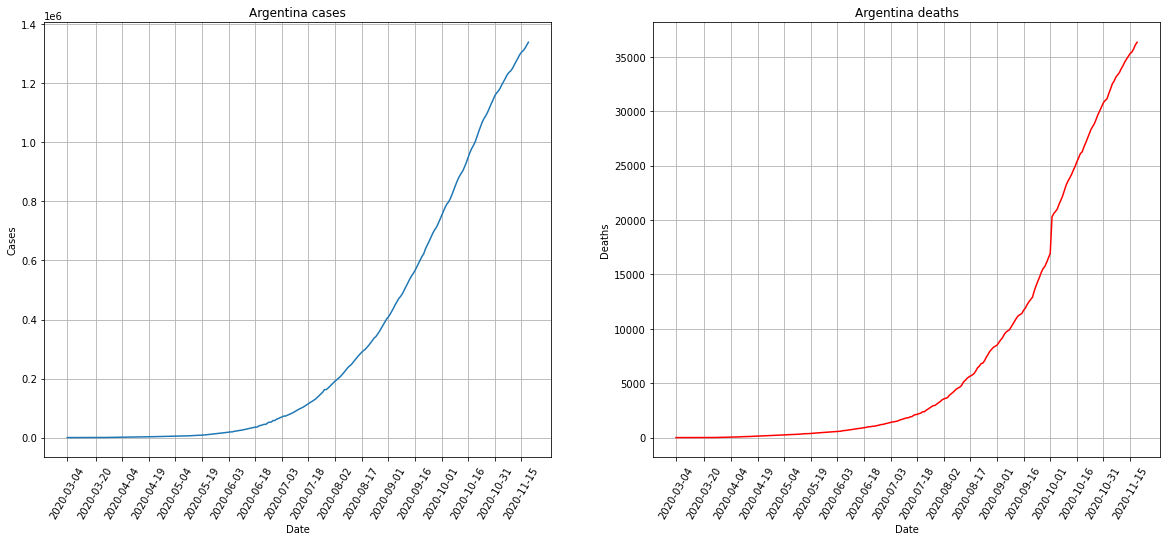

In [96]:
def plot_casosYmuertes(country):    # solo funciona con un pais

    pais_date, pais_cases, pais_deaths = casosYmuertes_pais(country)
    #Charts
    plt.figure(figsize=(20, 8), facecolor='white')

    #Cases
    plt.subplot(1, 2, 1)
    
    plt.plot(pais_date, pais_cases)
    plt.xticks(pais_date[::15], rotation=60)

    plt.title(country + ' cases')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    plt.grid()


    #Deaths
    plt.subplot(1, 2, 2)
    
    plt.plot(pais_date, pais_deaths, color='r')
    plt.xticks(pais_date[::15], rotation=60)

    plt.title(country + ' deaths')
    plt.xlabel('Date')
    plt.ylabel('Deaths')
    
    plt.grid()
    plt.show()
    
plot_casosYmuertes('Argentina')

In [98]:
def comparar_2paises(country1, country2):
    
    # Genero un dataFrame por cada pais
    pais1 = filtrar_pais(country1)
    pais2 = filtrar_pais(country2)
    

    data = pd.merge(pais1, pais2, on='date')  # Data limpia
    
    
    # Actualizo los datos
    date = data['date']
    pais1_cases, pais1_deaths = data['total_cases_x'], data['total_deaths_x']
    pais2_cases, pais2_deaths = data['total_cases_y'], data['total_deaths_y']
    

    # Analizo los cruces
    cruce_date_cases = []
    cruce_cases = []
    cruce_date_deaths = []
    cruce_deaths = []

    # Cases
    for i in range(len(date)-1):
        if (((pais1_cases[i] >= pais2_cases[i]) and (pais1_cases[i+1] < pais2_cases[i+1]))) or (((pais2_cases[i] >= pais1_cases[i]) and (pais2_cases[i+1] < pais1_cases[i+1]))):
              cruce_date_cases.append(date[i])
              cruce_cases.append(pais1_cases[i])
    # Deaths
    for i in range(len(date)-1):
        if (((pais1_deaths[i] >= pais2_deaths[i]) and (pais1_deaths[i+1] < pais2_deaths[i+1]))) or (((pais2_deaths[i] >= pais1_deaths[i]) and (pais2_deaths[i+1] < pais1_deaths[i+1]))):
              cruce_date_deaths.append(date[i])
              cruce_deaths.append(pais1_deaths[i])
    
      
    # Grafico

    plt.figure(figsize=(20, 8), facecolor='white')
    #Cases
    plt.subplot(1, 2, 1)
    
    # Grafico paises
    plt.plot(date, pais1_cases, label=country1)
    plt.plot(date, pais2_cases, label=country2)
    
    # Grafico Intersecciones
    plt.scatter(cruce_date_cases, cruce_cases, s=70, c='red')


    plt.xticks(date[::15], rotation=60)


    plt.title(country1 + ' vs. ' + country2 + ' cases', fontsize=18)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Cases', fontsize=18)
    plt.grid()
    plt.legend()



    #Deaths
    plt.subplot(1, 2, 2)
    
    # Grafico paises
    plt.plot(date, pais1_deaths, label=country1)
    plt.plot(date, pais2_deaths, label=country2)

    # Grafico Intersecciones
    plt.scatter(cruce_date_deaths, cruce_deaths, s=70, c='red')
    
    plt.xticks(date[::15], rotation=60)

    plt.title(country1 + ' vs. ' + country2 + ' deaths', fontsize=18)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Deaths', fontsize=18)
    plt.legend()
    plt.grid()
    plt.show()
    
    

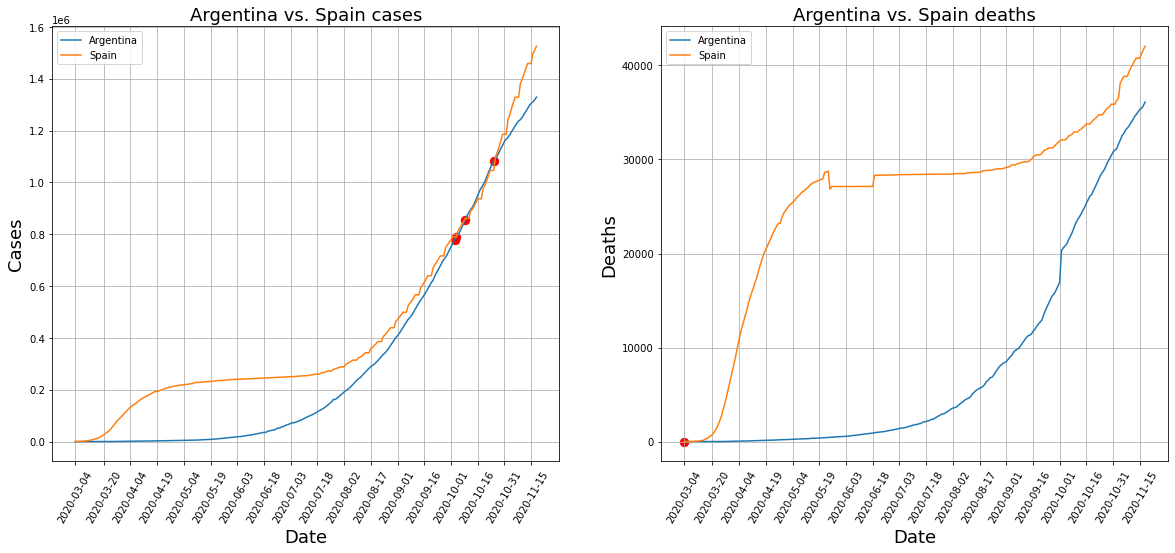

In [99]:
comparar_2paises('Argentina', 'Spain')

In [101]:
mergear_deaths(['Argentina', 'France', 'Brazil', 'Spain'])

,date,deaths_Argentina,deaths_France,deaths_Brazil,deaths_Spain
0,2020-03-04,0.0,4.0,0.0,0.0
1,2020-03-06,0.0,7.0,0.0,3.0
2,2020-03-07,0.0,9.0,0.0,5.0
3,2020-03-08,1.0,10.0,0.0,5.0
4,2020-03-09,1.0,19.0,0.0,5.0
...,...,...,...,...,...
254,2020-11-14,35045.0,43892.0,164737.0,40769.0
255,2020-11-15,35307.0,44246.0,165658.0,40769.0
256,2020-11-16,35436.0,44548.0,165658.0,41253.0
257,2020-11-17,35727.0,45054.0,166014.0,41688.0


In [104]:
def plotearN_paises(lista_paises):
    
    df_paises = mergear_cases(lista_paises)
    
    start_date, end_date = rango_dias()
    
    df_paises_rango = df_paises[(df_paises['date'] >= start_date) & (df_paises['date'] <= end_date)]
    
    date = df_paises_rango['date'] 
    cols = df_paises_rango.columns
    
    #Charts
    plt.figure(figsize=(15,8), facecolor='white')
    for i in range(1, len(cols)):                        # La 1er columna es de fechas, arranco en 1
        plt.plot(date, df_paises_rango[cols[i]], label=cols[i])
    
    plt.ticklabel_format(axis='Y' ,style='plain') 
    
    plt.title('Argentina vs bordering countrie Cases', fontsize=18)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Cases', fontsize=18)

    
    
    plt.yscale('log')
    plt.xticks(date[::10], rotation=40)
    plt.legend()
    plt.grid()
    plt.savefig('argentinaVsBorderingCases.jpg')
    plt.show()

Ingrese fecha desde: yyyy-mm-dd 2020-07-21
Ingrese fecha hasta: yyyy-mm-dd 2020-09-21


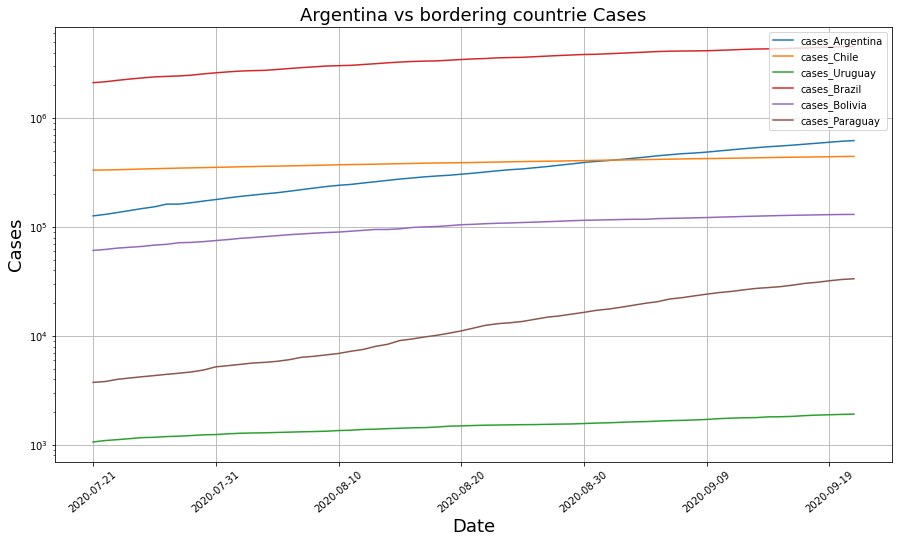

In [105]:
plotearN_paises(['Argentina', 'Chile', 'Uruguay', 'Brazil', 'Bolivia', 'Paraguay'])


In [16]:
2020-07-21
2020-09-21

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (<ipython-input-16-db09baaad08a>, line 1)